Making a nicer pie-chart than https://en.wikipedia.org/wiki/File:Pie_chart_of_lung_cancers.svg

Data from the wikipedia page (or from table 2 in [doi:10.1136/tc.2007.022582](https://doi.org/10.1136/tc.2007.022582))
````
Squamous Cell Carcinoma - non-smoker:	1,0%
Squamous Cell Carcinoma - smoker:	15,7%
Small Cell Carcinoma - non-smoker:	0,3%
Small Cell Carcinoma - smoker:	24,0%
Adenocarcinoma - non-smoker:	11,6%
Adenocarcinoma - smoker:	38,9%
Large Cell Carcinoma - non-smoker:	1,5%
Large Cell Carcinoma - smoker:	6,7%
Other or unspecified:	0,4%
````

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import numpy as np

In [2]:
seaborn.set_context("poster")
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['savefig.transparent'] = True

In [3]:
# # Simplest case, original data
# labels = ['Squamous Cell Carcinoma - non-smoker',
#           'Squamous Cell Carcinoma - smoker',
#           'Small Cell Carcinoma - non-smoker',
#           'Small Cell Carcinoma - smoker',
#           'Adenocarcinoma - non-smoker',
#           'Adenocarcinoma - smoker',
#           'Large Cell Carcinoma - non-smoker',
#           'Large Cell Carcinoma - smoker'
#           'Other']
# sizes = [1, 15.7, 0.3, 24.0, 11.6, 38.9, 1.5, 6.7]
# patches, texts = plt.pie(sizes, startangle=90)
# plt.legend(patches, labels, loc="best")
# plt.axis('equal')
# plt.tight_layout()
# plt.show()

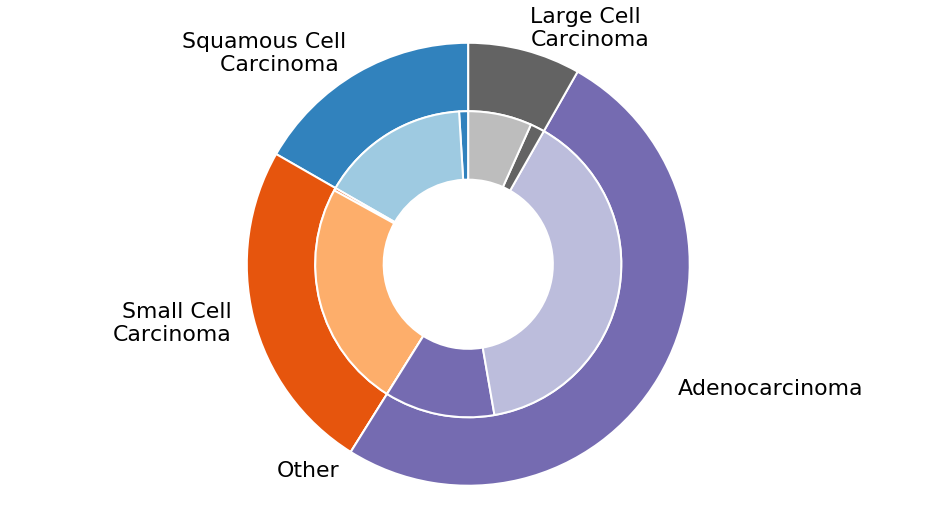

In [4]:
# Based on
# https://matplotlib.org/gallery/pie_and_polar_charts/nested_pie.html#sphx-glr-gallery-pie-and-polar-charts-nested-pie-py
# and
# https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

# Data
labels = ['Squamous Cell\nCarcinoma ',
          'Small Cell\nCarcinoma', 
          'Other',
          'Adenocarcinoma',
          'Large Cell\nCarcinoma']
sizes = np.array([[7, 1+4+34+76],
                  [2, 1+5+60+110],
                  [0, 1+1+4+7-6+4+5+13-29+34+60+83+19-196+76+110+185+23-394],
                  [85, 4+13+83+185],
                  [11, 7+19+23]])
# Set up
size = 0.309
start = 90
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(5)*4)
inner_colors = cmap(np.arange(10)*2)

# Plot
plt.pie(sizes.sum(axis=1),
        labels=labels,
        radius=1,
        startangle=start,
        colors=outer_colors,
        wedgeprops=dict(width=size,
                        edgecolor='w'))
    
plt.pie(sizes.flatten(),
        radius=1-size,
        colors=inner_colors,
        startangle=start,
        wedgeprops=dict(width=size,
                        edgecolor='w'))
plt.axis('equal')
# plt.tight_layout()
plt.savefig('cancerincidences.png',
            bbox_inches='tight')
plt.show()

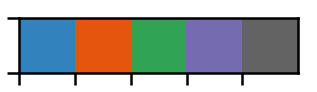

In [5]:
seaborn.palplot(outer_colors)

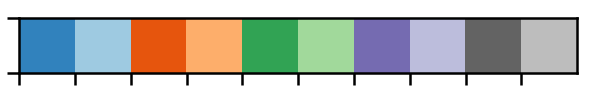

In [6]:
seaborn.palplot(cmap(np.arange(10)*2))

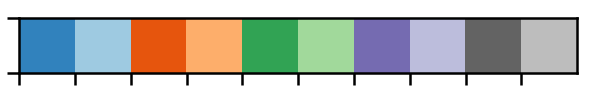

In [7]:
seaborn.palplot(inner_colors)